# 12

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Countryclusters.csv')


In [ ]:
df.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


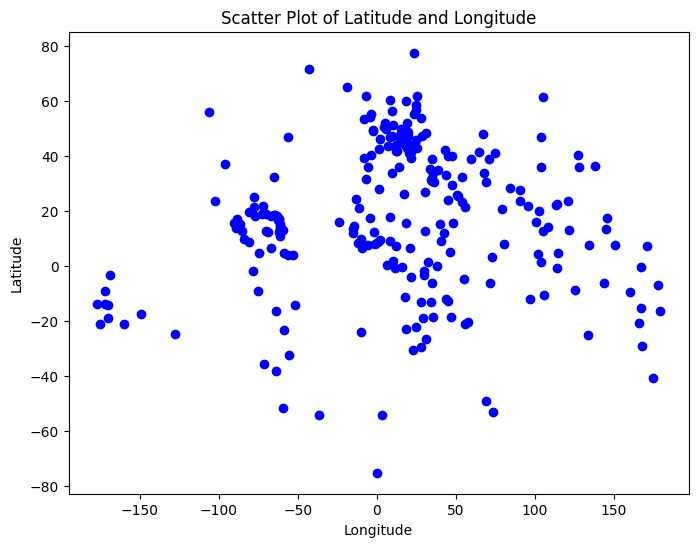

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Assuming 'Latitude' and 'Longitude' are the column names in your CSV
latitude = df['latitude']
longitude = df['longitude']

# Create a scatter plot of latitude and longitude
plt.figure(figsize=(8, 6))
plt.scatter(longitude, latitude, color='blue', marker='o')

# Add labels and title
plt.title('Scatter Plot of Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


## My

In [ ]:
import numpy as np
import pandas as pd

# Extract the relevant features (latitude and longitude)
data = df[['latitude', 'longitude']].values


In [ ]:
# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to implement KMeans
def kmeans(data, k, max_iterations=100):
    # Randomly initialize centroids by selecting 'k' random points from the dataset
    np.random.seed(42)
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    # Loop for a maximum number of iterations or until convergence
    for iteration in range(max_iterations):
        # Step 2: Assign clusters
        clusters = [[] for _ in range(k)]
        for point in data:
            # Compute the distance between each point and each centroid
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            # Assign the point to the closest centroid
            closest_centroid_index = np.argmin(distances)
            clusters[closest_centroid_index].append(point)

        # Step 3: Update centroids
        new_centroids = np.array([np.mean(cluster, axis=0) if cluster else centroids[i] for i, cluster in enumerate(clusters)])

        # If the centroids do not change, we have converged
        if np.all(centroids == new_centroids):
            print(f"Converged after {iteration+1} iterations")
            break
        centroids = new_centroids

    return centroids, clusters

In [ ]:
# Run KMeans on the dataset with k=3
k = 3
centroids, clusters = kmeans(data, k)

# Display the centroids
print("Final centroids:")
print(centroids)

# Display the clusters
for i, cluster in enumerate(clusters):
    print(f"Cluster {i + 1}: {len(cluster)} points")

Converged after 7 iterations
Final centroids:
[[ 24.71285426  20.70229888]
 [  6.91280651 119.65713794]
 [  4.58866556 -85.17153469]]
Cluster 1: 136 points
Cluster 2: 47 points
Cluster 3: 61 points


Converged after 7 iterations


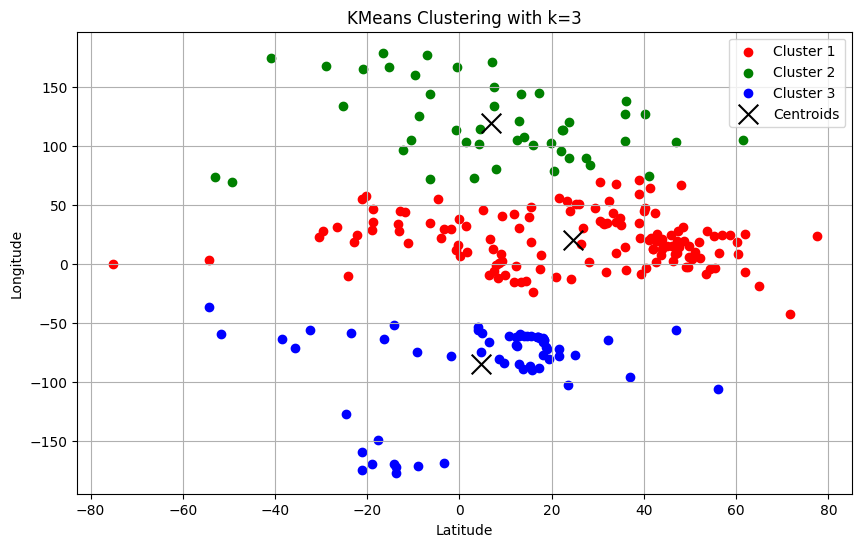

In [ ]:
import matplotlib.pyplot as plt

# Visualize the clusters and centroids
def visualize_clusters(data, centroids, clusters):
    # Assign a different color to each cluster
    colors = ['r', 'g', 'b', 'y', 'c', 'm']

    plt.figure(figsize=(10, 6))

    # Plot each cluster with a distinct color
    for i, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        if len(cluster) > 0:
            plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i % len(colors)], label=f'Cluster {i+1}')

    # Plot the centroids as 'X' marks
    plt.scatter(centroids[:, 0], centroids[:, 1], c='k', marker='x', s=200, label='Centroids')

    # Add labels and title
    plt.title(f'KMeans Clustering with k={len(centroids)}')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run KMeans on the dataset with k=3
k = 3
centroids, clusters = kmeans(data, k)

# Visualize the clusters and centroids
visualize_clusters(data, centroids, clusters)


## Kmean

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load data
data = pd.read_csv('/content/Countryclusters.csv', encoding='latin1')
x = df[['latitude', 'longitude']].values




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

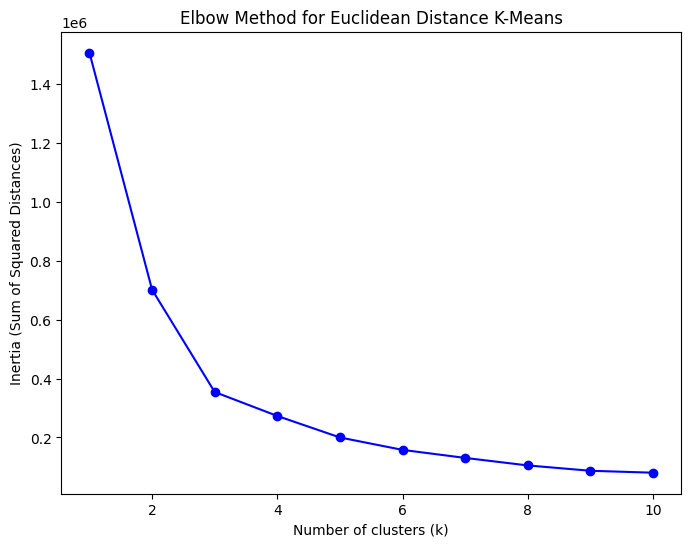

In [ ]:
from sklearn.cluster import KMeans

# Elbow Method for K-Means using Euclidean distance
def elbow_method_euclidean(X, max_k=10):
    inertia_values = []
    k_values = range(1, max_k+1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia_values.append(kmeans.inertia_)  # Inertia is already calculated by sklearn's KMeans

    plt.figure(figsize=(8, 6))
    plt.plot(k_values, inertia_values, 'bo-')
    plt.title('Elbow Method for Euclidean Distance K-Means')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia (Sum of Squared Distances)')
    plt.show()

# Call the elbow method for Euclidean distance K-Means
elbow_method_euclidean(x, max_k=10)


In [ ]:
# Step 2: Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))


In [ ]:
import numpy as np

# Step 3: Initialize centroids randomly (ensures random initialization each run)
def initialize_centroids(data, k):
    # Randomly select k data points to be the initial centroids
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices, :]


In [ ]:

# Step 4: Assign clusters by finding the closest centroid
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)  # Assign the closest centroid
        clusters.append(cluster)
    return np.array(clusters)



In [ ]:
# Step 5: Update centroids by calculating the mean of assigned points
def update_centroids(data, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = data[clusters == i]
        new_centroid = np.mean(cluster_points, axis=0)
        new_centroids.append(new_centroid)
    return np.array(new_centroids)



In [ ]:
def print_centroids(centroids):
    print("Centroids of each cluster:")
    for idx, centroid in enumerate(centroids):
        print(f"Cluster {idx + 1}: {centroid}")


In [ ]:
# Step 6: KMeans algorithm
def kmeans(data, k, max_iterations=100):
    # Step 1: Initialize centroids
    centroids = initialize_centroids(data, k)

    for _ in range(max_iterations):
        # Step 2: Assign clusters
        clusters = assign_clusters(data, centroids)

        # Step 3: Update centroids
        new_centroids = update_centroids(data, clusters, k)

        # Step 4: Check if centroids have changed
        if np.all(new_centroids == centroids):
            break

        centroids = new_centroids
    print_centroids(centroids)


    return centroids, clusters


In [ ]:
# Step 7: Visualize the clusters
def plot_clusters(data, clusters, centroids, k):
    plt.figure(figsize=(8, 6))
    colors = ['r', 'g', 'b', 'y']

    for i in range(k):
        cluster_points = data[clusters == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, color=colors[i], label=f"Cluster {i+1}")

    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='black', marker='X', label='Centroids')
    plt.title(f'K-Means Clustering with {k} clusters')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.show()


In [ ]:

# Step 8: Execute the KMeans function with k=4 clusters
k = 4
centroids, clusters = kmeans(x, k)


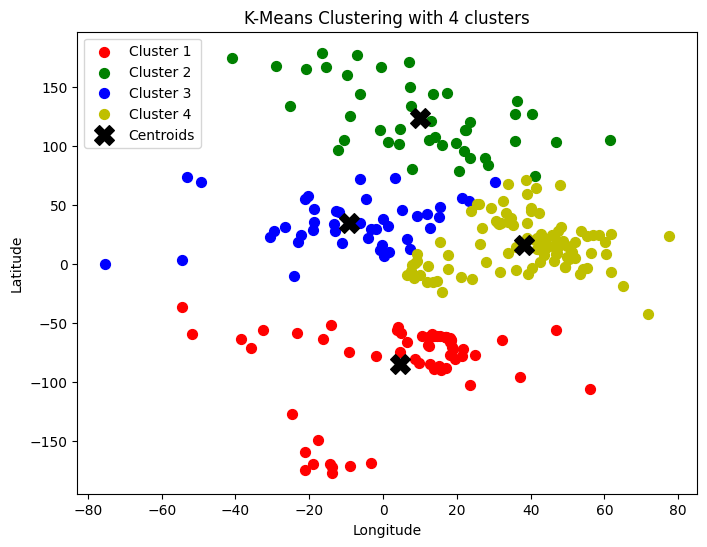

In [ ]:

# Step 9: Plot the results
plot_clusters(x, clusters, centroids, k)

Centroids of each cluster:
Cluster 1: [-0.12579  29.896387]
Cluster 2: [ 10.2193665 117.844092 ]
Cluster 3: [ 12.9248605 -67.825118 ]
Cluster 4: [42.655657 19.259763]


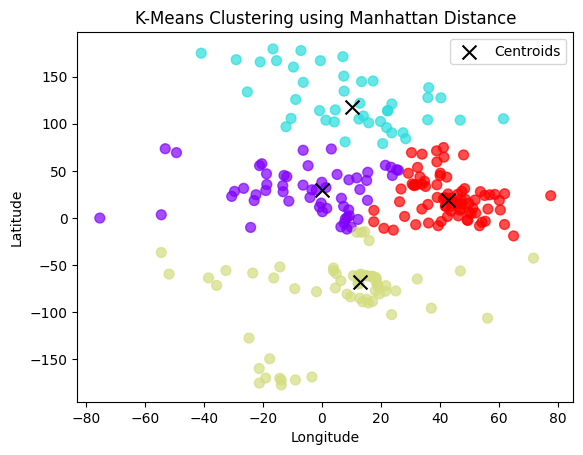

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset (longitude, latitude)
data = pd.read_csv('/content/Countryclusters.csv', encoding='latin1')
x = df[['latitude', 'longitude']].values


# Function to calculate Manhattan distance
def manhattan_distance(point1, point2):
    return np.sum(np.abs(point1 - point2))

# Step 2: Initializing Centroids
def initialize_centroids(X, k):
    np.random.seed(42)
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

# Step 3: Assigning Clusters based on Manhattan distance
def assign_clusters(X, centroids):
    clusters = []
    for point in X:
        distances = [manhattan_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

# Step 4: Recomputing Centroids
def recompute_centroids(X, clusters, k):
    new_centroids = []
    for cluster in range(k):
        cluster_points = X[clusters == cluster]
        if len(cluster_points) > 0:
            new_centroid = np.median(cluster_points, axis=0)
        else:
            new_centroid = np.random.uniform(np.min(X, axis=0), np.max(X, axis=0))
        new_centroids.append(new_centroid)
    return np.array(new_centroids)

# Step 5: K-Means Clustering Algorithm
def kmeans_manhattan(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = recompute_centroids(X, clusters, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    print_centroids(centroids)

    return clusters, centroids

# Step 6: Running the K-Means Algorithm
k = 4  # Number of clusters
clusters, centroids = kmeans_manhattan(x, k)

# Plotting the results
plt.scatter(x[:, 0], x[:, 1], c=clusters, cmap='rainbow', marker='o', s=50, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
plt.title('K-Means Clustering using Manhattan Distance')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


Centroids of each cluster:
Cluster 1: [16.8692345 18.1821485]
Centroids of each cluster:
Cluster 1: [ 10.2193665 105.1548595]
Cluster 2: [17.5892405  3.941565 ]
Centroids of each cluster:
Cluster 1: [  7.131474 113.543873]
Cluster 2: [32.8255495 20.535654 ]
Cluster 3: [ 12.865416 -69.060087]
Centroids of each cluster:
Cluster 1: [ 12.9248605 -67.825118 ]
Cluster 2: [-0.12579  29.896387]
Cluster 3: [42.655657 19.259763]
Cluster 4: [ 10.2193665 117.844092 ]
Centroids of each cluster:
Cluster 1: [ 0.7798465 11.982083 ]
Cluster 2: [47.166   12.56738]
Cluster 3: [ 12.693263  -70.0654945]
Cluster 4: [29.8434905 47.5293465]
Cluster 5: [  7.425554 114.727669]
Centroids of each cluster:
Cluster 1: [ 9.1948445 -1.2923935]
Cluster 2: [-4.679574 42.590275]
Cluster 3: [43.94236  19.699024]
Cluster 4: [ 14.275486  -64.8268525]
Cluster 5: [ 10.2193665 117.844092 ]
Cluster 6: [ -15.975357 -169.999725]
Centroids of each cluster:
Cluster 1: [ -9.2599635 166.2747725]
Cluster 2: [45.5215805  9.519642 ]
Cl

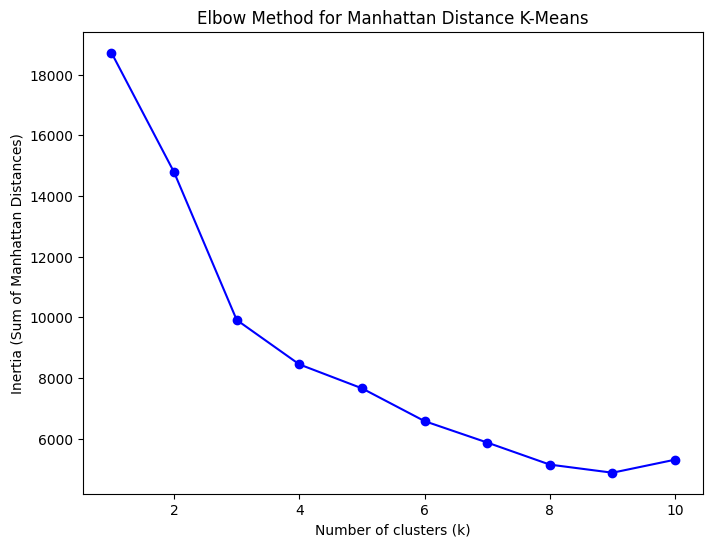

In [ ]:

# Function to compute total Manhattan distance (inertia)
def compute_inertia(X, clusters, centroids):
    inertia = 0
    for i, point in enumerate(X):
        centroid = centroids[clusters[i]]
        inertia += manhattan_distance(point, centroid)
    return inertia

# Elbow Method to find the optimal number of clusters using Manhattan distance
def elbow_method_manhattan(X, max_k=10):
    inertia_values = []
    k_values = range(1, max_k+1)

    for k in k_values:
        clusters, centroids = kmeans_manhattan(X, k)
        inertia = compute_inertia(X, clusters, centroids)
        inertia_values.append(inertia)

    plt.figure(figsize=(8, 6))
    plt.plot(k_values, inertia_values, 'bo-')
    plt.title('Elbow Method for Manhattan Distance K-Means')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia (Sum of Manhattan Distances)')
    plt.show()

# Now call the elbow method before running K-Means
elbow_method_manhattan(x, max_k=10)


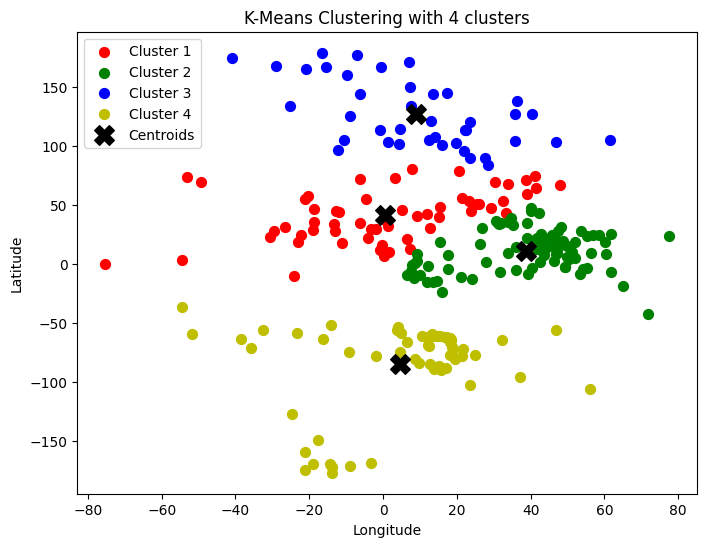

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load data
data = pd.read_csv('/content/Countryclusters.csv', encoding='latin1')
x = data.iloc[:, 1:3].values  # Extracting longitude and latitude columns

# Step 2: Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Step 3: Initialize centroids randomly
def initialize_centroids(data, k):
    # Use np.random.choice to ensure random selection of centroids
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices, :]

# Step 4: Assign clusters by finding the closest centroid
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)  # Assign the closest centroid
        clusters.append(cluster)
    return np.array(clusters)

# Step 5: Update centroids by calculating the mean of assigned points
def update_centroids(data, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:  # Check for empty clusters
            new_centroid = np.mean(cluster_points, axis=0)
            new_centroids.append(new_centroid)
        else:  # Handle empty cluster by reinitializing it randomly
            new_centroids.append(data[np.random.randint(0, data.shape[0])])
    return np.array(new_centroids)

# Step 6: KMeans algorithm
def kmeans(data, k, max_iterations=100):
    # Step 1: Initialize centroids
    centroids = initialize_centroids(data, k)

    for _ in range(max_iterations):
        # Step 2: Assign clusters
        clusters = assign_clusters(data, centroids)

        # Step 3: Update centroids
        new_centroids = update_centroids(data, clusters, k)

        # Step 4: Check if centroids have changed
        if np.all(new_centroids == centroids):
            break

        centroids = new_centroids

    return centroids, clusters

# Step 7: Visualize the clusters
def plot_clusters(data, clusters, centroids, k):
    plt.figure(figsize=(8, 6))
    colors = ['r', 'g', 'b', 'y']

    for i in range(k):
        cluster_points = data[clusters == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, color=colors[i], label=f"Cluster {i+1}")

    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='black', marker='X', label='Centroids')
    plt.title(f'K-Means Clustering with {k} clusters')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.show()

# Step 8: Execute the KMeans function with k=4 clusters
k = 4
centroids, clusters = kmeans(x, k)

# Step 9: Plot the results
plot_clusters(x, clusters, centroids, k)


## PCA

Columns in DataFrame: Index(['slength', 'swidth', 'plength', 'pwidth', 'target'], dtype='object')
   slength  swidth  plength  pwidth       target
0      5.1     3.5      1.4     0.2  Iris-setosa
1      4.9     3.0      1.4     0.2  Iris-setosa
2      4.7     3.2      1.3     0.2  Iris-setosa
3      4.6     3.1      1.5     0.2  Iris-setosa
4      5.0     3.6      1.4     0.2  Iris-setosa


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-110-20bc62fb4811>:44: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(subset['PC1'], subset['PC2'], label=f'Target {target_name}', edgecolor='k', alpha=0.5, marker='x')


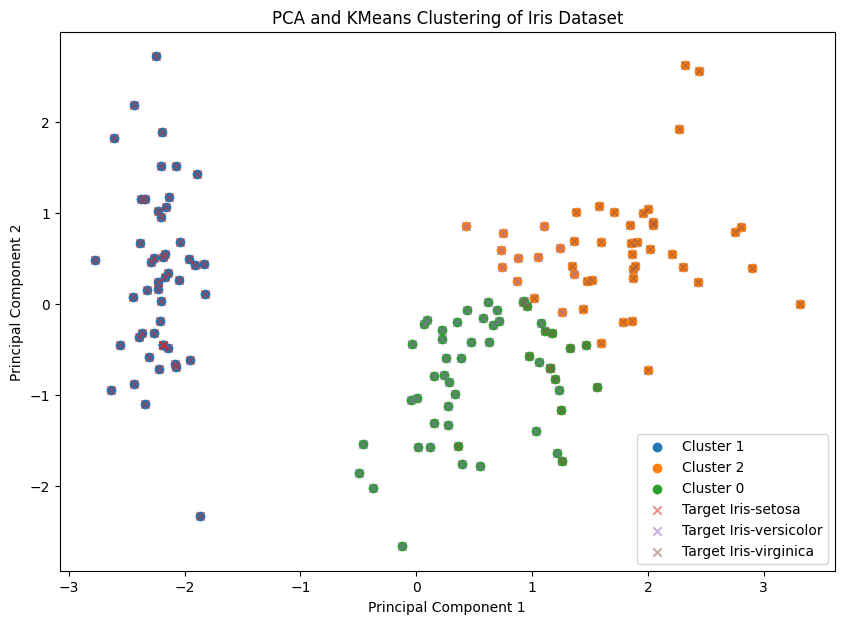

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/iris.csv')

# Inspect the first few rows and columns
print("Columns in DataFrame:", df.columns)
print(df.head())

# Separate features and target
features = df.drop('target', axis=1)  # Assuming 'target' is the column name for the species
target = df['target']

# Standardize the feature data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(pca_result)

# Create a DataFrame with PCA results and clusters
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters
pca_df['target'] = target

# Plot the PCA results with KMeans clustering
plt.figure(figsize=(10, 7))
for cluster in pca_df['cluster'].unique():
    subset = pca_df[pca_df['cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}')

# Also plot the true targets for comparison
for target_name in pca_df['target'].unique():
    subset = pca_df[pca_df['target'] == target_name]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Target {target_name}', edgecolor='k', alpha=0.5, marker='x')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and KMeans Clustering of Iris Dataset')
plt.legend()
plt.show()
